In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [6]:
from tensorflow.keras.optimizers import Adam#RMSprop
from tensorflow.keras.activations import relu

In [7]:
df=pd.read_csv (r"C:\Users\nirma\Downloads\advertising (4).csv")
df.duplicated().sum()


0

In [8]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(3,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

c:\Users\nirma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)


In [13]:
model=Sequential([
Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
Dense(64,activation='relu'),
Dense(32,activation='relu'),
Dense(1)])

c:\Users\nirma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=(x_val,y_val),verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 221.8612 - mae: 13.9028 - val_loss: 192.9952 - val_mae: 12.7504
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 219.1065 - mae: 13.9722 - val_loss: 176.1887 - val_mae: 12.0694
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 204.6807 - mae: 13.3597 - val_loss: 150.1359 - val_mae: 10.9230
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 176.4099 - mae: 12.3492 - val_loss: 111.6947 - val_mae: 8.9784
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 132.5000 - mae: 10.2977 - val_loss: 65.3663 - val_mae: 6.6617
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.5910 - mae: 7.0847 - val_loss: 32.8862 - val_mae: 4.5919
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.6058 - mae: 4.5191 - val_loss: 32.3905 - val_mae: 3.8520
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3311 - mae: 3.9821 - val_loss: 30.2910 - val_mae: 3.5596
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [19]:

y_pred =model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"mean_squared_error:{mse}")
print(f"mean_absolute_error:{mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
mean_squared_error:3.2514003949766037
mean_absolute_error:1.2203397178649902


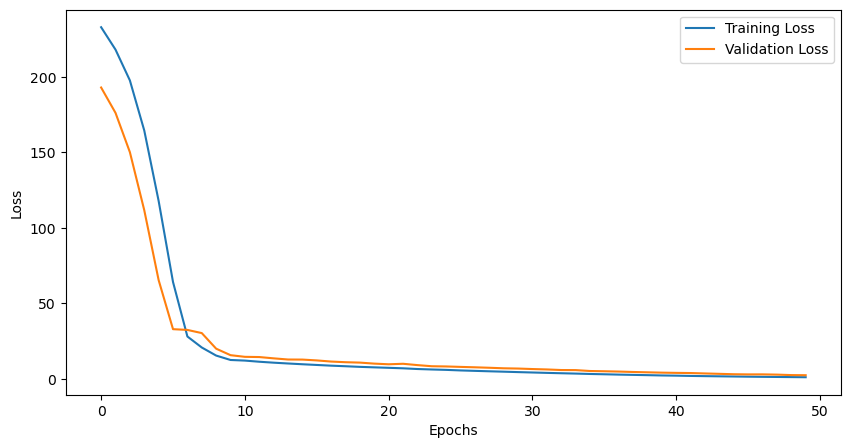

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
